In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder

In [2]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [3]:
df_train.head()

date_time  deg_C  relative_humidity  absolute_humidity  sensor_1  \
0  2010-03-10 18:00:00   13.1               46.0             0.7578    1387.2   
1  2010-03-10 19:00:00   13.2               45.3             0.7255    1279.1   
2  2010-03-10 20:00:00   12.6               56.2             0.7502    1331.9   
3  2010-03-10 21:00:00   11.0               62.4             0.7867    1321.0   
4  2010-03-10 22:00:00   11.9               59.0             0.7888    1272.0   

   sensor_2  sensor_3  sensor_4  sensor_5  target_carbon_monoxide  \
0    1087.8    1056.0    1742.8    1293.4                     2.5   
1     888.2    1197.5    1449.9    1010.9                     2.1   
2     929.6    1060.2    1586.1    1117.0                     2.2   
3     929.0    1102.9    1536.5    1263.2                     2.2   
4     852.7    1180.9    1415.5    1132.2                     1.5   

   target_benzene  target_nitrogen_oxides  
0            12.0                   167.7  
1             9.9                    98.9  
2             9.2                   127.1  
3             9.7                   177.2  
4             6.4                   121.8

In [4]:
df_test.head()

date_time  deg_C  relative_humidity  absolute_humidity  sensor_1  \
0  2011-01-01 00:00:00    8.0               41.3             0.4375    1108.8   
1  2011-01-01 01:00:00    5.1               51.7             0.4564    1249.5   
2  2011-01-01 02:00:00    5.8               51.5             0.4689    1102.6   
3  2011-01-01 03:00:00    5.0               52.3             0.4693    1139.7   
4  2011-01-01 04:00:00    4.5               57.5             0.4650    1022.4   

   sensor_2  sensor_3  sensor_4  sensor_5  
0     745.7     797.1     880.0    1273.1  
1     864.9     687.9     972.8    1714.0  
2     878.0     693.7     941.9    1300.8  
3     916.2     725.6    1011.0    1283.0  
4     838.5     871.5     967.0    1142.3

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7111 entries, 0 to 7110
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date_time               7111 non-null   object 
 1   deg_C                   7111 non-null   float64
 2   relative_humidity       7111 non-null   float64
 3   absolute_humidity       7111 non-null   float64
 4   sensor_1                7111 non-null   float64
 5   sensor_2                7111 non-null   float64
 6   sensor_3                7111 non-null   float64
 7   sensor_4                7111 non-null   float64
 8   sensor_5                7111 non-null   float64
 9   target_carbon_monoxide  7111 non-null   float64
 10  target_benzene          7111 non-null   float64
 11  target_nitrogen_oxides  7111 non-null   float64
dtypes: float64(11), object(1)
memory usage: 666.8+ KB


In [6]:
df_train.describe()

deg_C  relative_humidity  absolute_humidity     sensor_1  \
count  7111.000000        7111.000000        7111.000000  7111.000000   
mean     20.878034          47.561004           1.110309  1091.572100   
std       7.937917          17.398731           0.398950   218.537554   
min       1.300000           8.900000           0.198800   620.300000   
25%      14.900000          33.700000           0.855900   930.250000   
50%      20.700000          47.300000           1.083500  1060.500000   
75%      25.800000          60.800000           1.404150  1215.800000   
max      46.100000          90.800000           2.231000  2088.300000   

          sensor_2     sensor_3     sensor_4     sensor_5  \
count  7111.000000  7111.000000  7111.000000  7111.000000   
mean    938.064970   883.903305  1513.238349   998.335565   
std     281.978988   310.456355   350.180310   381.537695   
min     364.000000   310.600000   552.900000   242.700000   
25%     734.900000   681.050000  1320.350000   722.850000   
50%     914.200000   827.800000  1513.100000   928.700000   
75%    1124.100000  1008.850000  1720.400000  1224.700000   
max    2302.600000  2567.400000  2913.800000  2594.600000   

       target_carbon_monoxide  target_benzene  target_nitrogen_oxides  
count             7111.000000     7111.000000             7111.000000  
mean                 2.086219       10.237083              204.066784  
std                  1.447109        7.694426              193.927723  
min                  0.100000        0.100000                1.900000  
25%                  1.000000        4.500000               76.450000  
50%                  1.700000        8.500000              141.000000  
75%                  2.800000       14.200000              260.000000  
max                 12.500000       63.700000             1472.300000

In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2247 entries, 0 to 2246
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date_time          2247 non-null   object 
 1   deg_C              2247 non-null   float64
 2   relative_humidity  2247 non-null   float64
 3   absolute_humidity  2247 non-null   float64
 4   sensor_1           2247 non-null   float64
 5   sensor_2           2247 non-null   float64
 6   sensor_3           2247 non-null   float64
 7   sensor_4           2247 non-null   float64
 8   sensor_5           2247 non-null   float64
dtypes: float64(8), object(1)
memory usage: 158.1+ KB


### dates conversion

In [8]:
print(df_train.date_time)

pd.to_datetime(df_train.date_time)

0       2010-03-10 18:00:00
1       2010-03-10 19:00:00
2       2010-03-10 20:00:00
3       2010-03-10 21:00:00
4       2010-03-10 22:00:00
               ...         
7106    2010-12-31 20:00:00
7107    2010-12-31 21:00:00
7108    2010-12-31 22:00:00
7109    2010-12-31 23:00:00
7110    2011-01-01 00:00:00
Name: date_time, Length: 7111, dtype: object


0      2010-03-10 18:00:00
1      2010-03-10 19:00:00
2      2010-03-10 20:00:00
3      2010-03-10 21:00:00
4      2010-03-10 22:00:00
               ...        
7106   2010-12-31 20:00:00
7107   2010-12-31 21:00:00
7108   2010-12-31 22:00:00
7109   2010-12-31 23:00:00
7110   2011-01-01 00:00:00
Name: date_time, Length: 7111, dtype: datetime64[ns]

In [9]:
df_train['date_time'] = pd.to_datetime(df_train['date_time'])
df_train['year'] = df_train.date_time.dt.year
df_train['month'] = df_train.date_time.dt.month
df_train['day'] = df_train.date_time.dt.day
df_train['hour'] = df_train.date_time.dt.hour
df_train['weekday'] = df_train.date_time.dt.weekday

df_test['date_time'] = pd.to_datetime(df_test.date_time)
df_test['year'] = df_test.date_time.dt.year
df_test['month'] = df_test.date_time.dt.month
df_test['day'] = df_test.date_time.dt.day
df_test['hour'] = df_test.date_time.dt.hour
df_test['weekday'] = df_test.date_time.dt.weekday

In [10]:
df_train['weekday'] = df_train['weekday'].astype(object)
one_hot = pd.get_dummies(df_train['weekday'])
df_train = df_train.drop('weekday', axis = 1)
df_train = df_train.join(one_hot)

df_test['weekday'] = df_test['weekday'].astype(object)
one_hot = pd.get_dummies(df_test['weekday'])
df_test = df_test.drop('weekday', axis = 1)
df_test = df_test.join(one_hot)

df_train.head()

date_time  deg_C  relative_humidity  absolute_humidity  sensor_1  \
0 2010-03-10 18:00:00   13.1               46.0             0.7578    1387.2   
1 2010-03-10 19:00:00   13.2               45.3             0.7255    1279.1   
2 2010-03-10 20:00:00   12.6               56.2             0.7502    1331.9   
3 2010-03-10 21:00:00   11.0               62.4             0.7867    1321.0   
4 2010-03-10 22:00:00   11.9               59.0             0.7888    1272.0   

   sensor_2  sensor_3  sensor_4  sensor_5  target_carbon_monoxide  ...  month  \
0    1087.8    1056.0    1742.8    1293.4                     2.5  ...      3   
1     888.2    1197.5    1449.9    1010.9                     2.1  ...      3   
2     929.6    1060.2    1586.1    1117.0                     2.2  ...      3   
3     929.0    1102.9    1536.5    1263.2                     2.2  ...      3   
4     852.7    1180.9    1415.5    1132.2                     1.5  ...      3   

   day  hour  0  1  2  3  4  5  6  
0   10    18  0  0  1  0  0  0  0  
1   10    19  0  0  1  0  0  0  0  
2   10    20  0  0  1  0  0  0  0  
3   10    21  0  0  1  0  0  0  0  
4   10    22  0  0  1  0  0  0  0  

[5 rows x 23 columns]

In [11]:
df_train.describe(include='all', datetime_is_numeric=True)

date_time        deg_C  relative_humidity  \
count                           7111  7111.000000        7111.000000   
mean   2010-08-05 20:59:59.999996416    20.878034          47.561004   
min              2010-03-10 18:00:00     1.300000           8.900000   
25%              2010-05-23 19:30:00    14.900000          33.700000   
50%              2010-08-05 21:00:00    20.700000          47.300000   
75%              2010-10-18 22:30:00    25.800000          60.800000   
max              2011-01-01 00:00:00    46.100000          90.800000   
std                              NaN     7.937917          17.398731   

       absolute_humidity     sensor_1     sensor_2     sensor_3     sensor_4  \
count        7111.000000  7111.000000  7111.000000  7111.000000  7111.000000   
mean            1.110309  1091.572100   938.064970   883.903305  1513.238349   
min             0.198800   620.300000   364.000000   310.600000   552.900000   
25%             0.855900   930.250000   734.900000   681.050000  1320.350000   
50%             1.083500  1060.500000   914.200000   827.800000  1513.100000   
75%             1.404150  1215.800000  1124.100000  1008.850000  1720.400000   
max             2.231000  2088.300000  2302.600000  2567.400000  2913.800000   
std             0.398950   218.537554   281.978988   310.456355   350.180310   

          sensor_5  target_carbon_monoxide  ...        month          day  \
count  7111.000000             7111.000000  ...  7111.000000  7111.000000   
mean    998.335565                2.086219  ...     7.647166    16.144705   
min     242.700000                0.100000  ...     1.000000     1.000000   
25%     722.850000                1.000000  ...     5.000000     9.000000   
50%     928.700000                1.700000  ...     8.000000    16.000000   
75%    1224.700000                2.800000  ...    10.000000    24.000000   
max    2594.600000               12.500000  ...    12.000000    31.000000   
std     381.537695                1.447109  ...     2.802293     8.758778   

              hour            0            1            2            3  \
count  7111.000000  7111.000000  7111.000000  7111.000000  7111.000000   
mean     11.505977     0.141752     0.141752     0.142596     0.145127   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       6.000000     0.000000     0.000000     0.000000     0.000000   
50%      12.000000     0.000000     0.000000     0.000000     0.000000   
75%      18.000000     0.000000     0.000000     0.000000     0.000000   
max      23.000000     1.000000     1.000000     1.000000     1.000000   
std       6.925721     0.348820     0.348820     0.349685     0.352254   

                 4            5            6  
count  7111.000000  7111.000000  7111.000000  
mean      0.145127     0.141893     0.141752  
min       0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000  
50%       0.000000     0.000000     0.000000  
75%       0.000000     0.000000     0.000000  
max       1.000000     1.000000     1.000000  
std       0.352254     0.348965     0.348820  

[8 rows x 23 columns]

In [12]:
targets = ['target_carbon_monoxide', 'target_benzene', 'target_nitrogen_oxides']

df_train[targets].describe()

target_carbon_monoxide  target_benzene  target_nitrogen_oxides
count             7111.000000     7111.000000             7111.000000
mean                 2.086219       10.237083              204.066784
std                  1.447109        7.694426              193.927723
min                  0.100000        0.100000                1.900000
25%                  1.000000        4.500000               76.450000
50%                  1.700000        8.500000              141.000000
75%                  2.800000       14.200000              260.000000
max                 12.500000       63.700000             1472.300000

### Time Series Plots

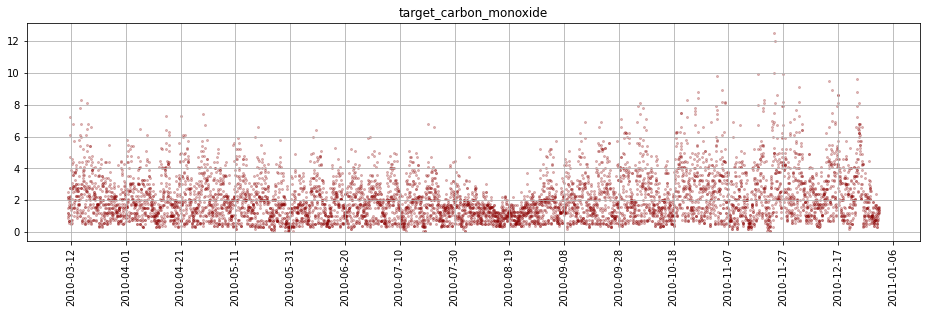

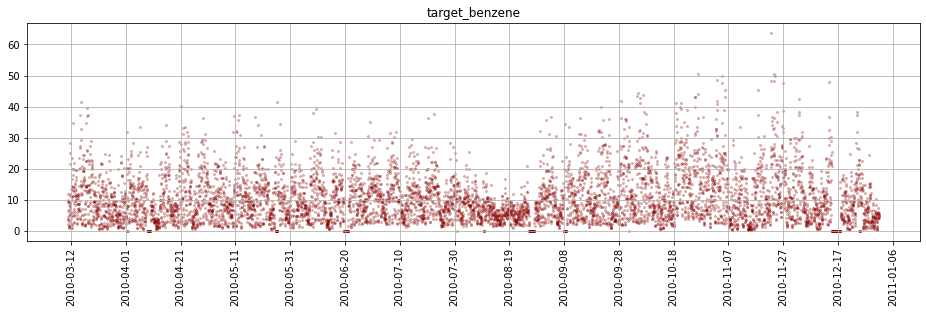

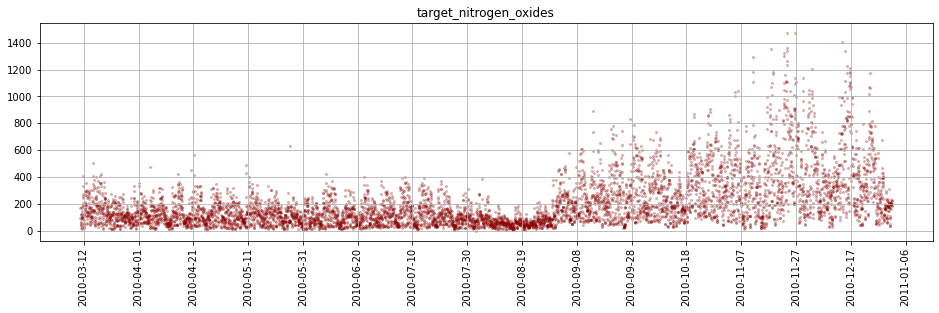

In [13]:
for t in targets:
    my_alpha=0.25
    fig, ax = plt.subplots(figsize=(16,4))
    ax.scatter(df_train.date_time, df_train[t], alpha=my_alpha, 
               color='darkred', s=4)
    ax.xaxis.set_major_locator(plt.MaxNLocator(20)) # reduce number of x-axis labels
    plt.xticks(rotation=90)
    plt.title(t)
    plt.grid()
    plt.show()

### Target Correlations

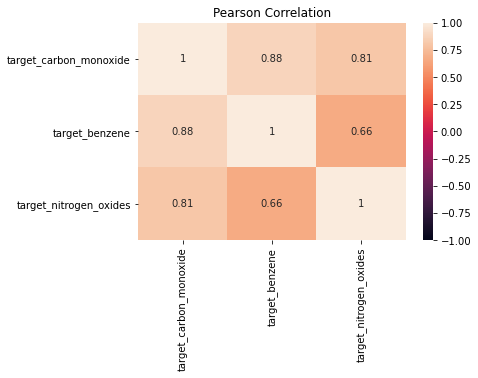

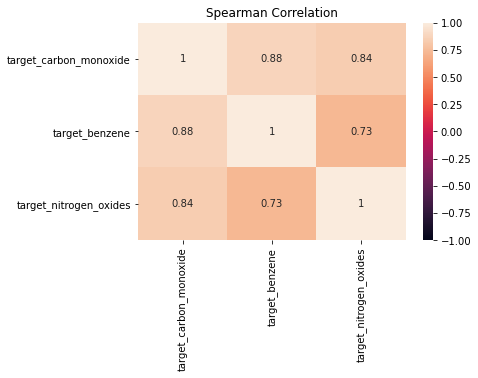

In [14]:
corr_targets_pearson = df_train[targets].corr(method="pearson")
corr_targets_spearman = df_train[targets].corr(method="spearman")

fig = plt.figure(figsize=(6, 4))
sns.heatmap(corr_targets_pearson, annot=True, vmin=-1, vmax=1)
plt.title("Pearson Correlation")
plt.show()

fig = plt.figure(figsize=(6, 4))
sns.heatmap(corr_targets_spearman, annot=True, vmin=-1, vmax=1)
plt.title("Spearman Correlation")
plt.show()

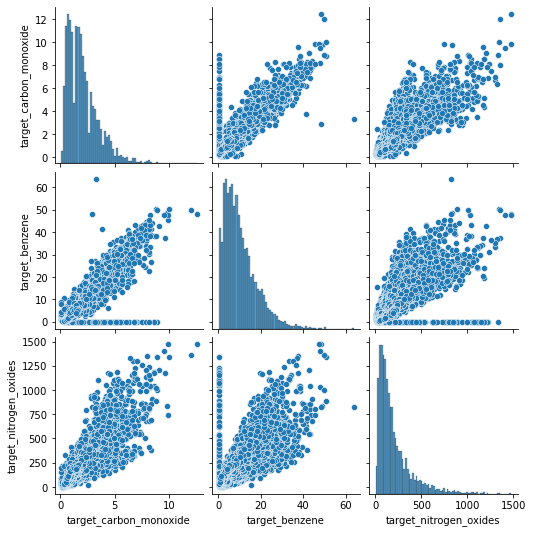

In [15]:
sns.pairplot(df_train[targets])
plt.show()

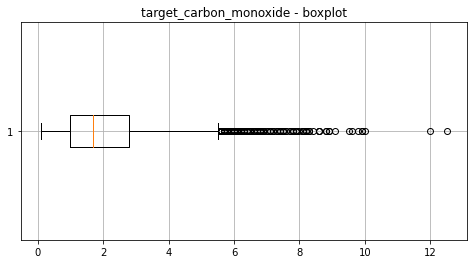

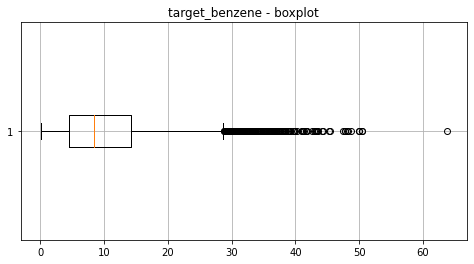

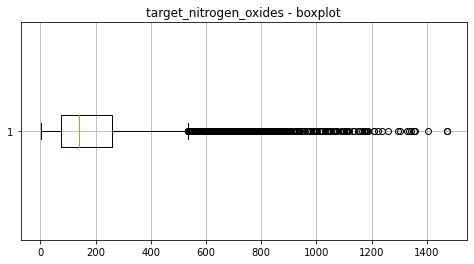

In [16]:
# add boxplots of targets to look for outliers
for t in targets:
    plt.figure(figsize=(8, 4))
    plt.boxplot(df_train[t], vert=False)
    plt.grid()
    plt.title(t + ' - boxplot')
    plt.show()

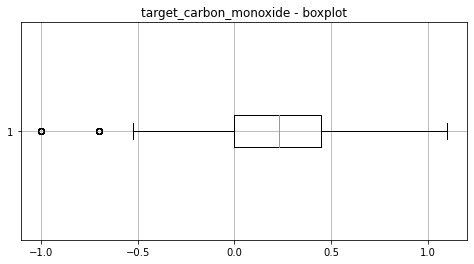

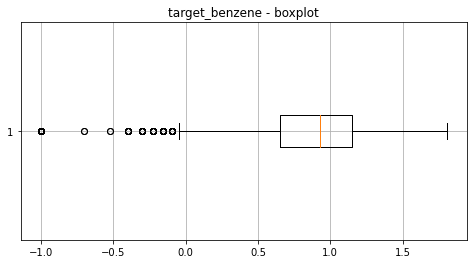

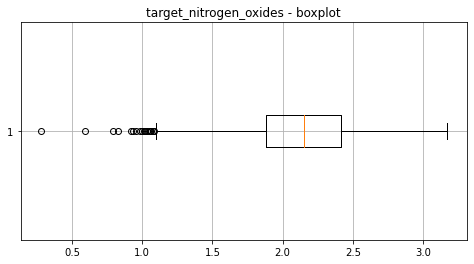

In [17]:
# same for the log
for t in targets:
    plt.figure(figsize=(8, 4))
    plt.boxplot(np.log10(df_train[t]), vert=False)
    plt.grid()
    plt.title(t + ' - boxplot')
    plt.show()

In [18]:
check = df_train[df_train.target_benzene <= 0.1]
print(check.shape)
check.head()

(228, 23)


date_time  deg_C  relative_humidity  absolute_humidity  \
524 2010-04-01 14:00:00   23.1               35.4             0.2170   
525 2010-04-01 15:00:00   24.3               33.1             0.2167   
526 2010-04-01 16:00:00   24.5               35.4             0.2163   
701 2010-04-08 23:00:00   25.4               31.6             0.2200   
702 2010-04-09 00:00:00   24.0               33.8             0.2136   

     sensor_1  sensor_2  sensor_3  sensor_4  sensor_5  target_carbon_monoxide  \
524    1061.0     369.3    1771.3     554.2     578.8                     1.6   
525    1038.6     396.8    1851.2     608.0     621.1                     1.9   
526    1083.1     381.1    1742.3     591.1     626.8                     2.4   
701    1138.0     393.3    1855.3     587.1     654.7                     2.1   
702    1054.7     384.4    1823.0     643.2     861.3                     2.4   

     ...  month  day  hour  0  1  2  3  4  5  6  
524  ...      4    1    14  0  0  0  1  0  0  0  
525  ...      4    1    15  0  0  0  1  0  0  0  
526  ...      4    1    16  0  0  0  1  0  0  0  
701  ...      4    8    23  0  0  0  1  0  0  0  
702  ...      4    9     0  0  0  0  0  1  0  0  

[5 rows x 23 columns]

We are not going to remove these for now.

### Numerical Features

In [19]:
# numerical features excluding time features
features_num = ['deg_C', 'relative_humidity', 'absolute_humidity',
                'sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5']

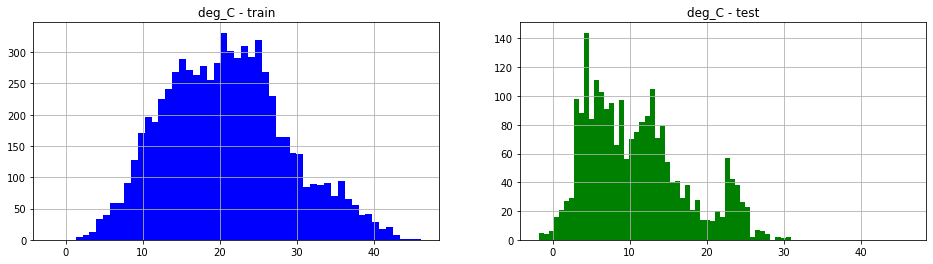

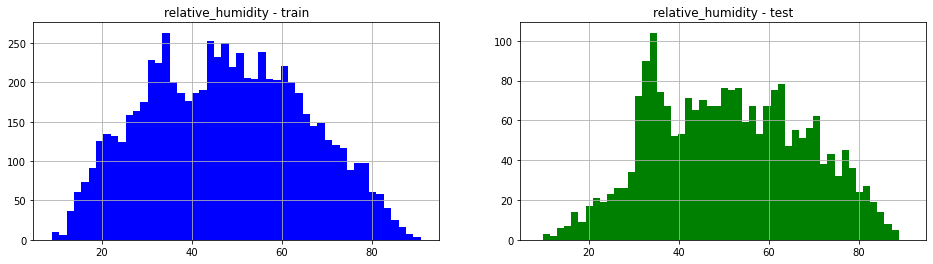

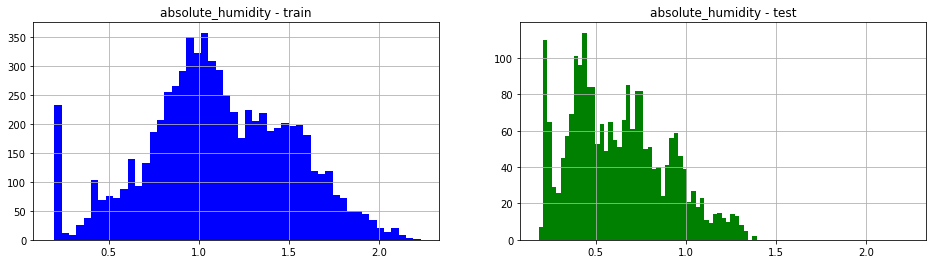

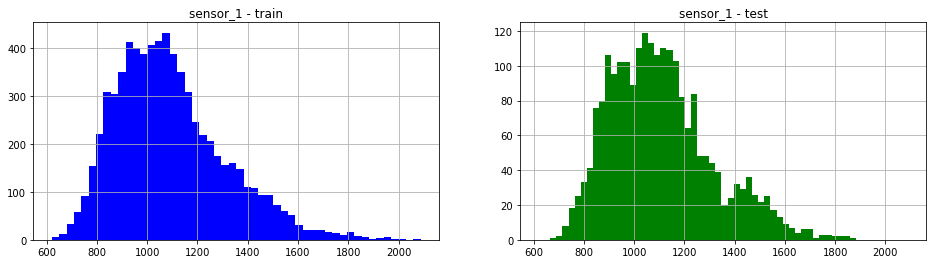

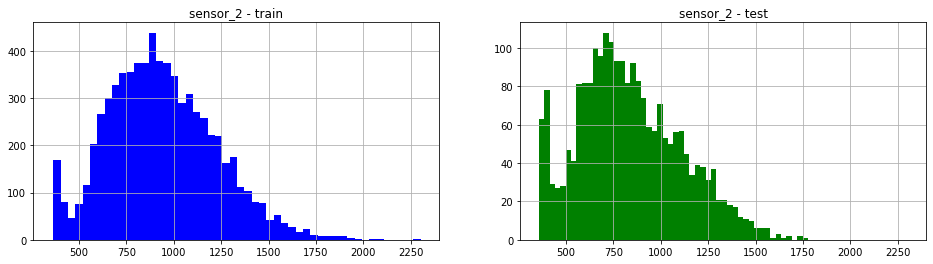

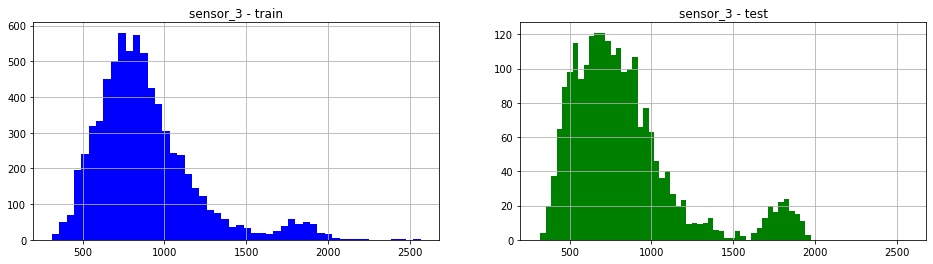

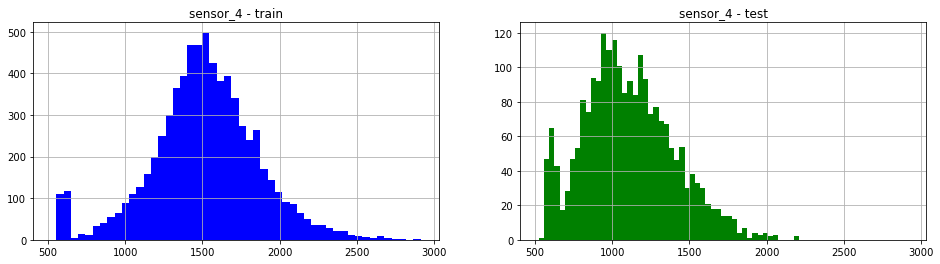

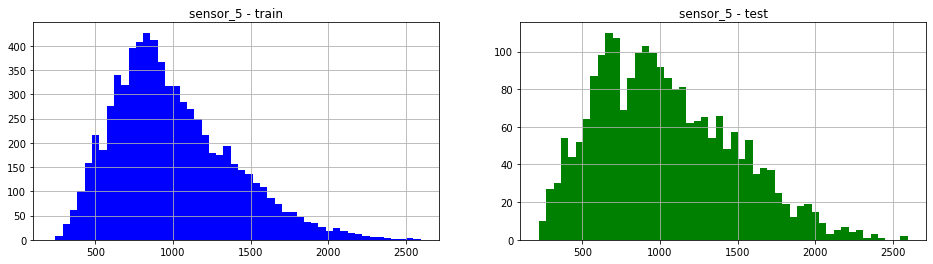

In [20]:
for f in features_num:
    
    plt.figure(figsize=(16,4))
    
    ax1 = plt.subplot(1,2,1)
    ax1.hist(df_train[f], bins=50, color='blue')
    ax1.grid()
    ax1.set_title(f + ' - train')
    
    ax2 = plt.subplot(1,2,2, sharex=ax1)
    ax2.hist(df_test[f], bins=50, color='green')
    ax2.grid()
    ax2.set_title(f + ' - test')
    
    plt.show()

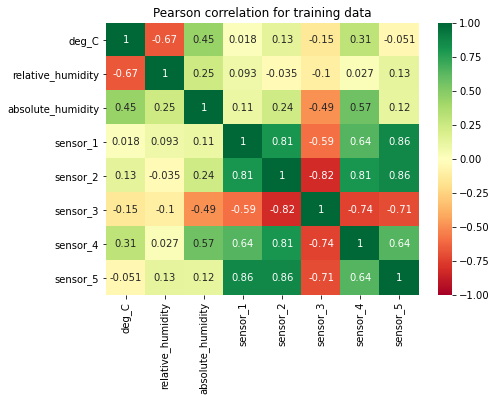

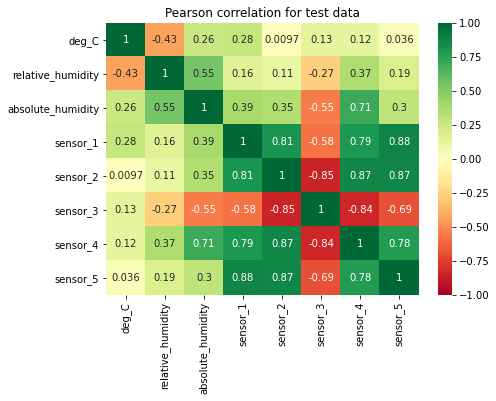

In [21]:
# correlations in the training numerical features
corr_pearson_train = df_train[features_num].corr(method="pearson")
corr_pearson_test = df_test[features_num].corr(method="pearson")

fig = plt.figure(figsize=(7,5))
sns.heatmap(corr_pearson_train, annot=True, cmap='RdYlGn', vmin=-1, vmax=1)
plt.title("Pearson correlation for training data")
plt.show()

fig = plt.figure(figsize=(7,5))
sns.heatmap(corr_pearson_test, annot=True, cmap='RdYlGn', vmin=-1, vmax=1)
plt.title("Pearson correlation for test data")
plt.show()

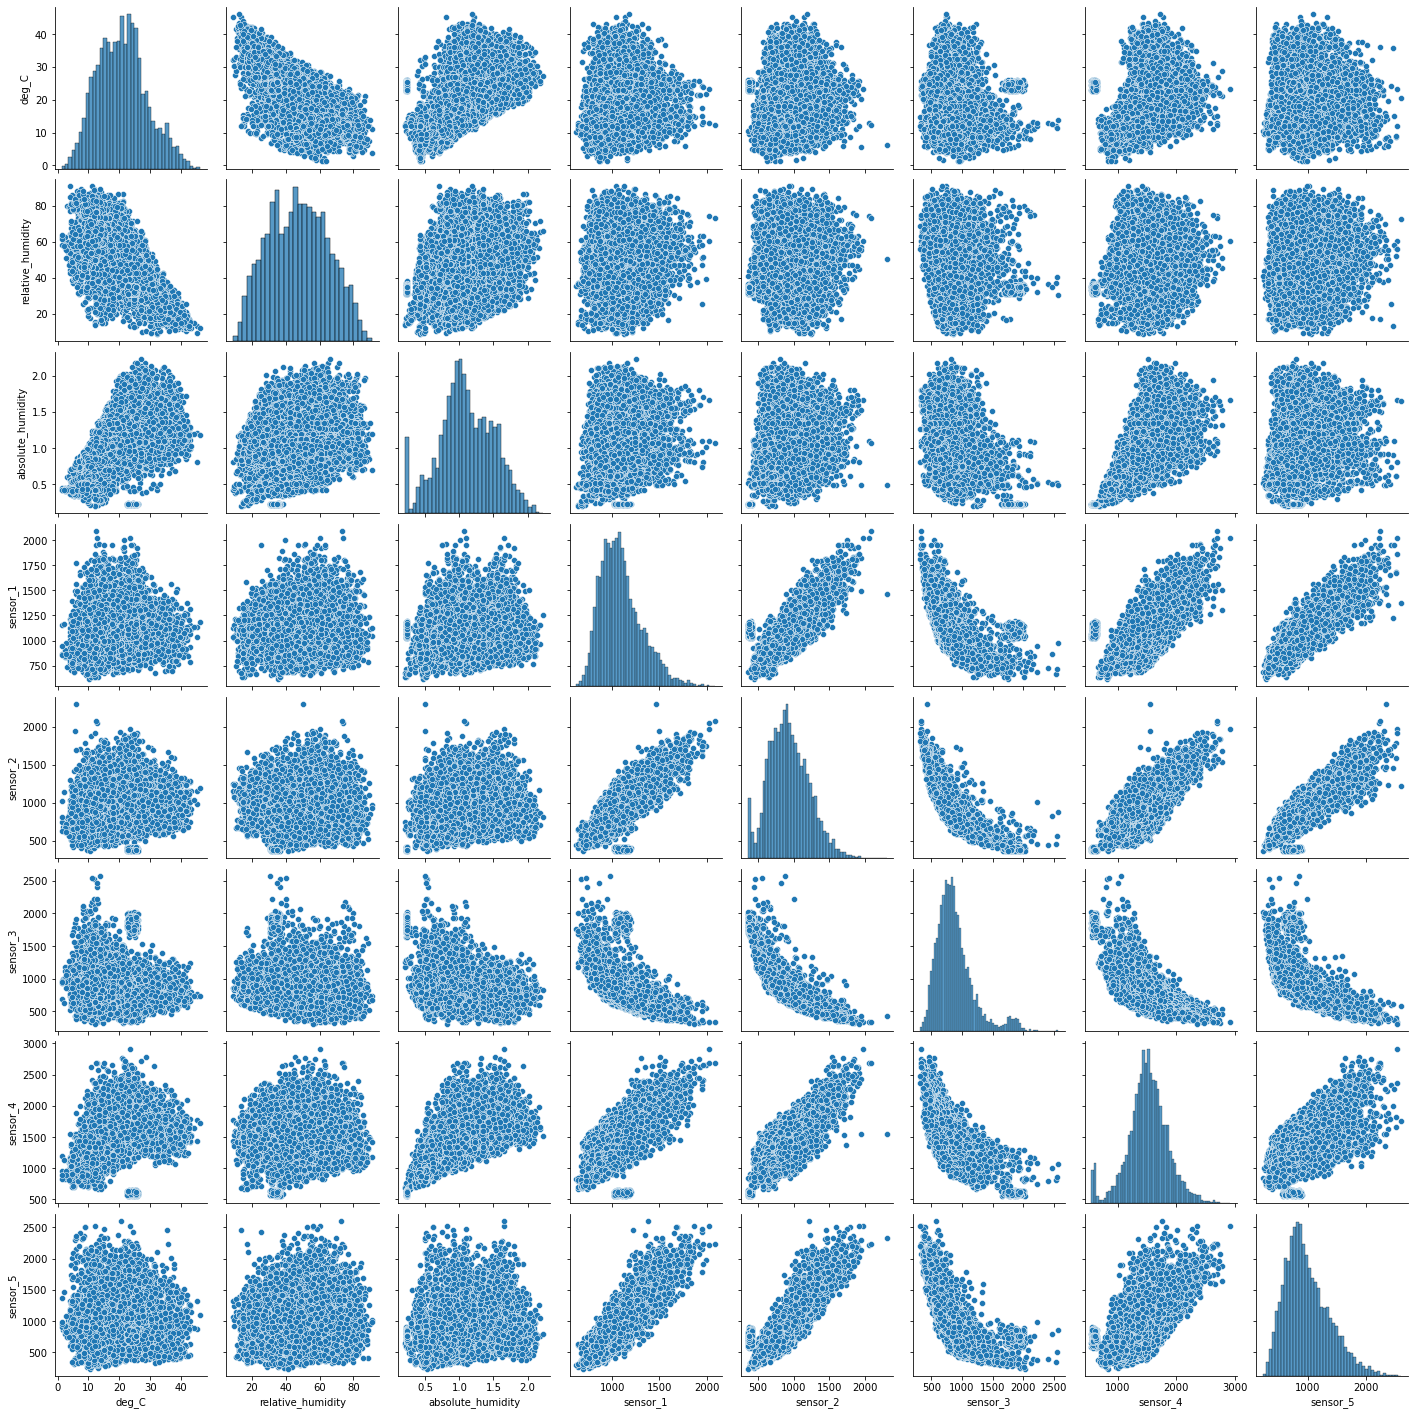

In [22]:
# scatter plots of features (train)
sns.pairplot(df_train[features_num])
plt.show()

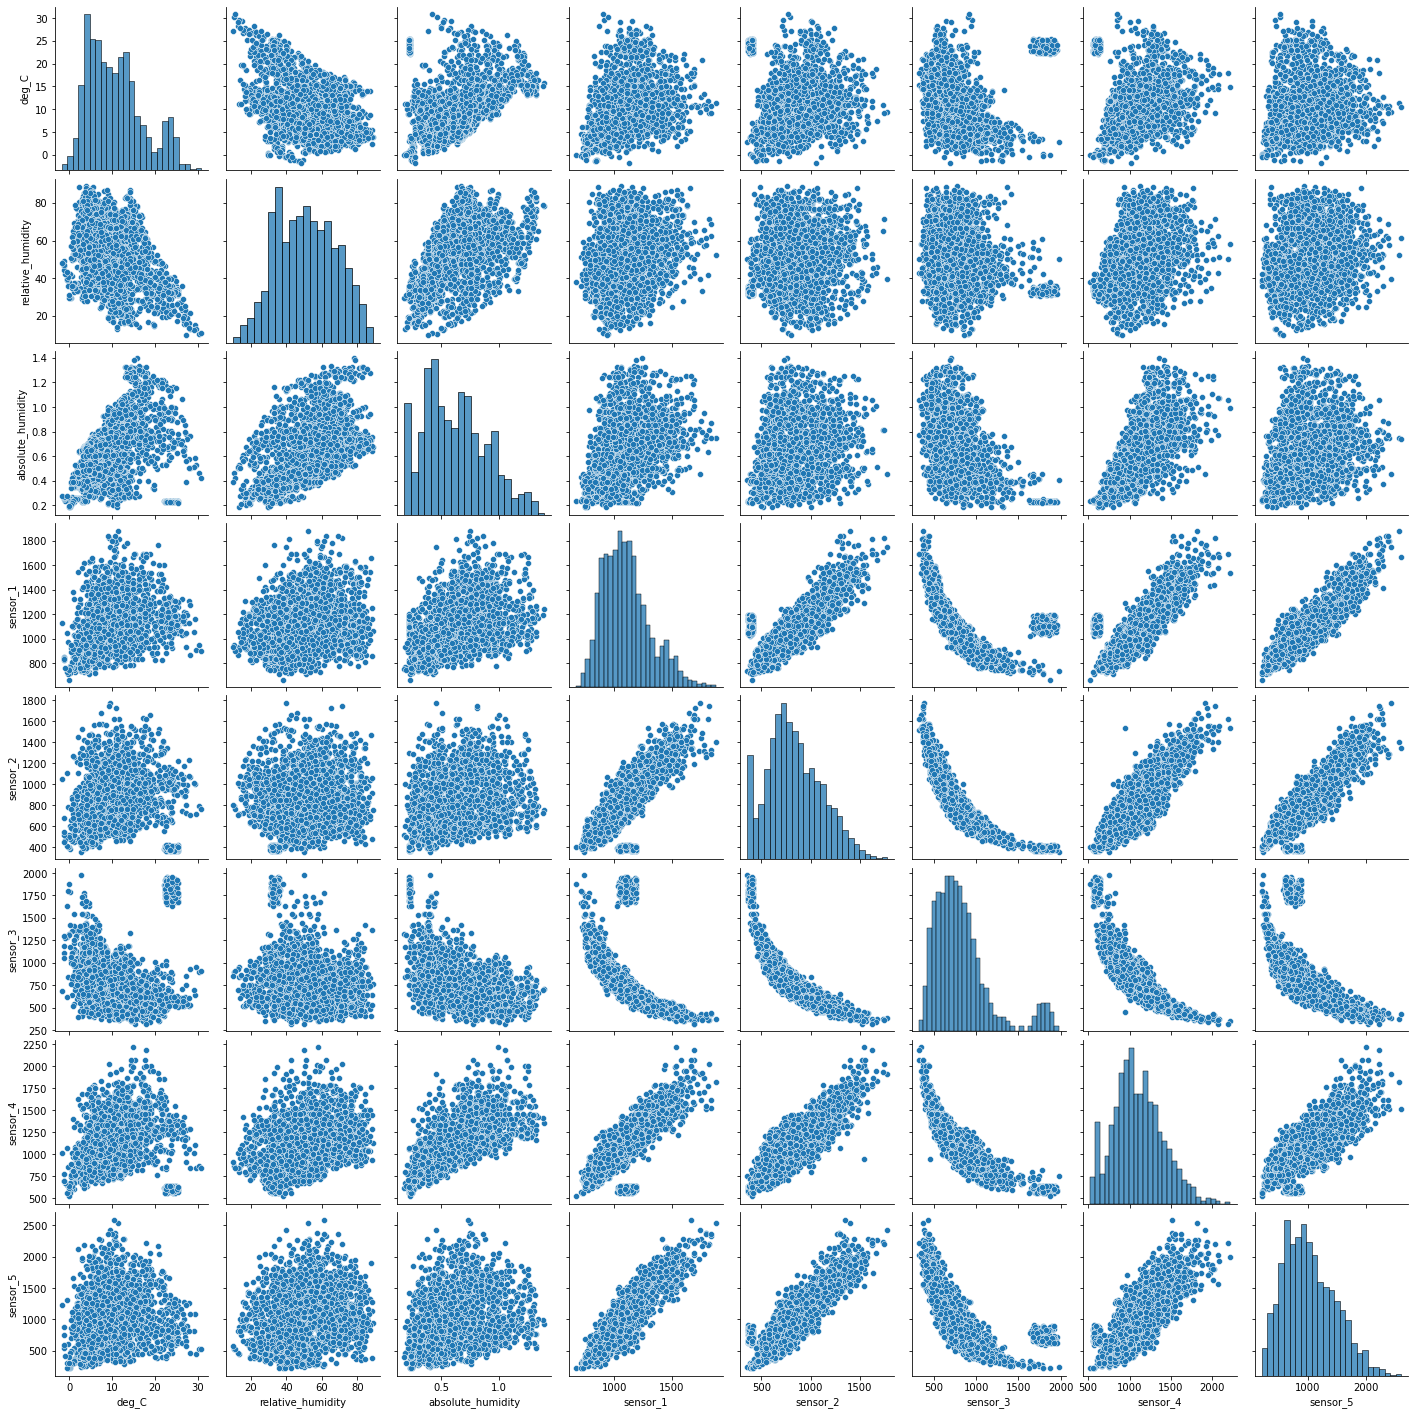

In [23]:
# scatter plots of features (test)
sns.pairplot(df_test[features_num])
plt.show()

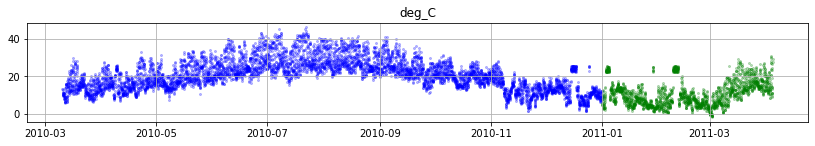

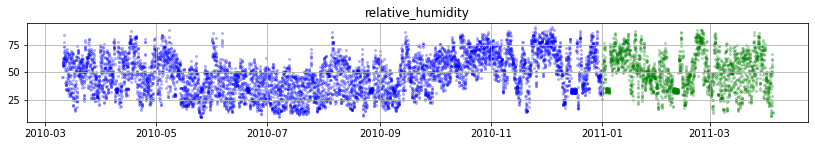

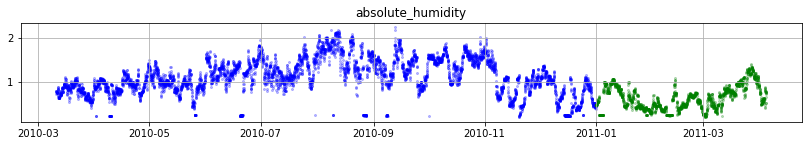

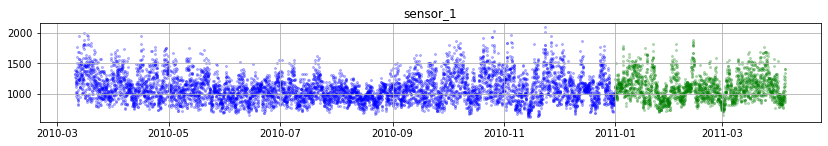

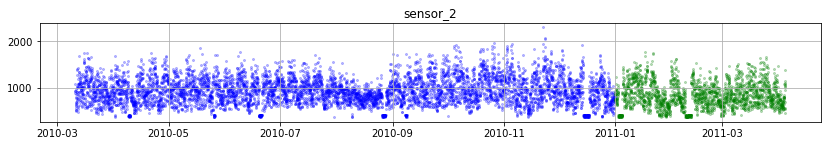

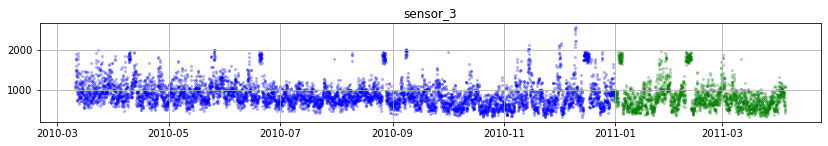

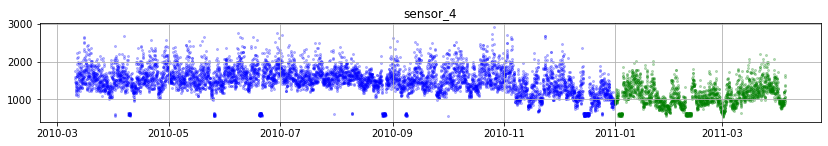

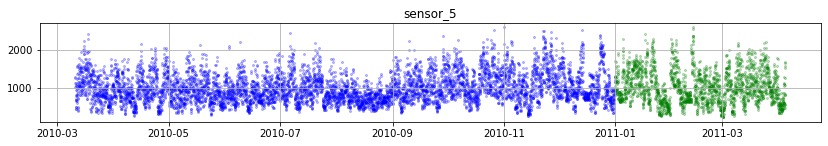

In [24]:
for f in features_num:
    plt.figure(figsize=(14,4))
    ax1 = plt.subplot(2,1,1)
    ax1.scatter(df_train.date_time, df_train[f], alpha=my_alpha, color='blue', s=4)
    ax1.scatter(df_test.date_time, df_test[f], alpha=my_alpha, color='green', s=4)
    plt.title(f)
    plt.grid()

In [25]:
# time features
features_time = ['year', 'month', 'day', 'hour']

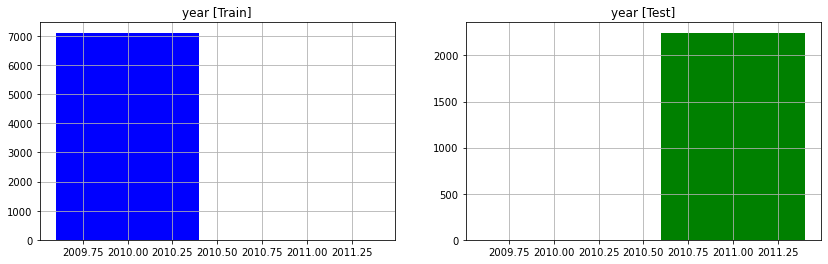

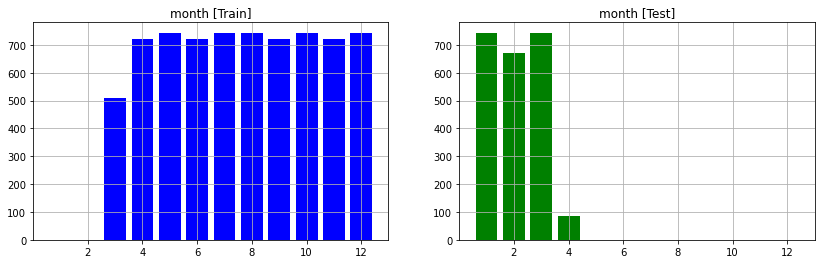

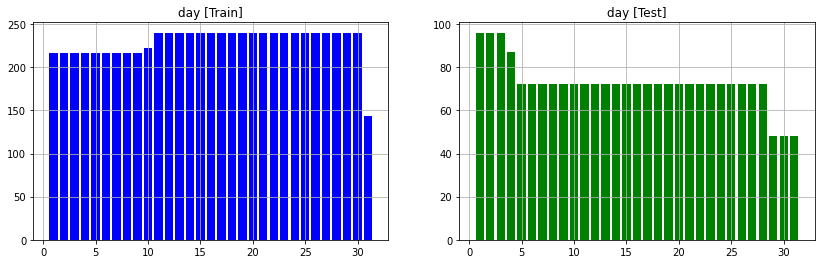

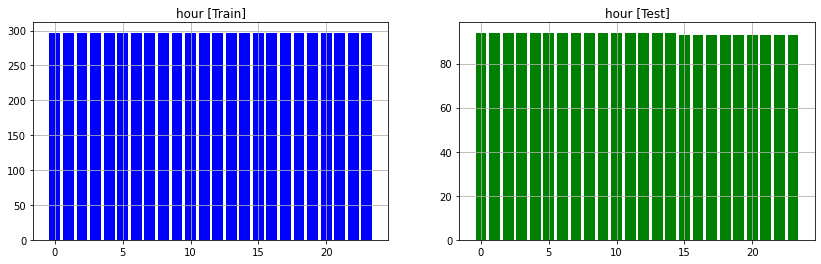

In [26]:
# plot distributions of time features
for f in features_time:
    plt.figure(figsize=(14,4))
    ax1 = plt.subplot(1,2,1)
    v = df_train[f].value_counts().sort_index()
    ax1.bar(height=v.values, x=v.index, color='blue')
    plt.title(f + ' [Train]')
    plt.grid()
    ax2 = plt.subplot(1,2,2, sharex=ax1)
    v = df_test[f].value_counts().sort_index()
    ax2.bar(height=v.values, x=v.index, color='green')
    plt.title(f + ' [Test]')
    plt.grid()
    plt.show()

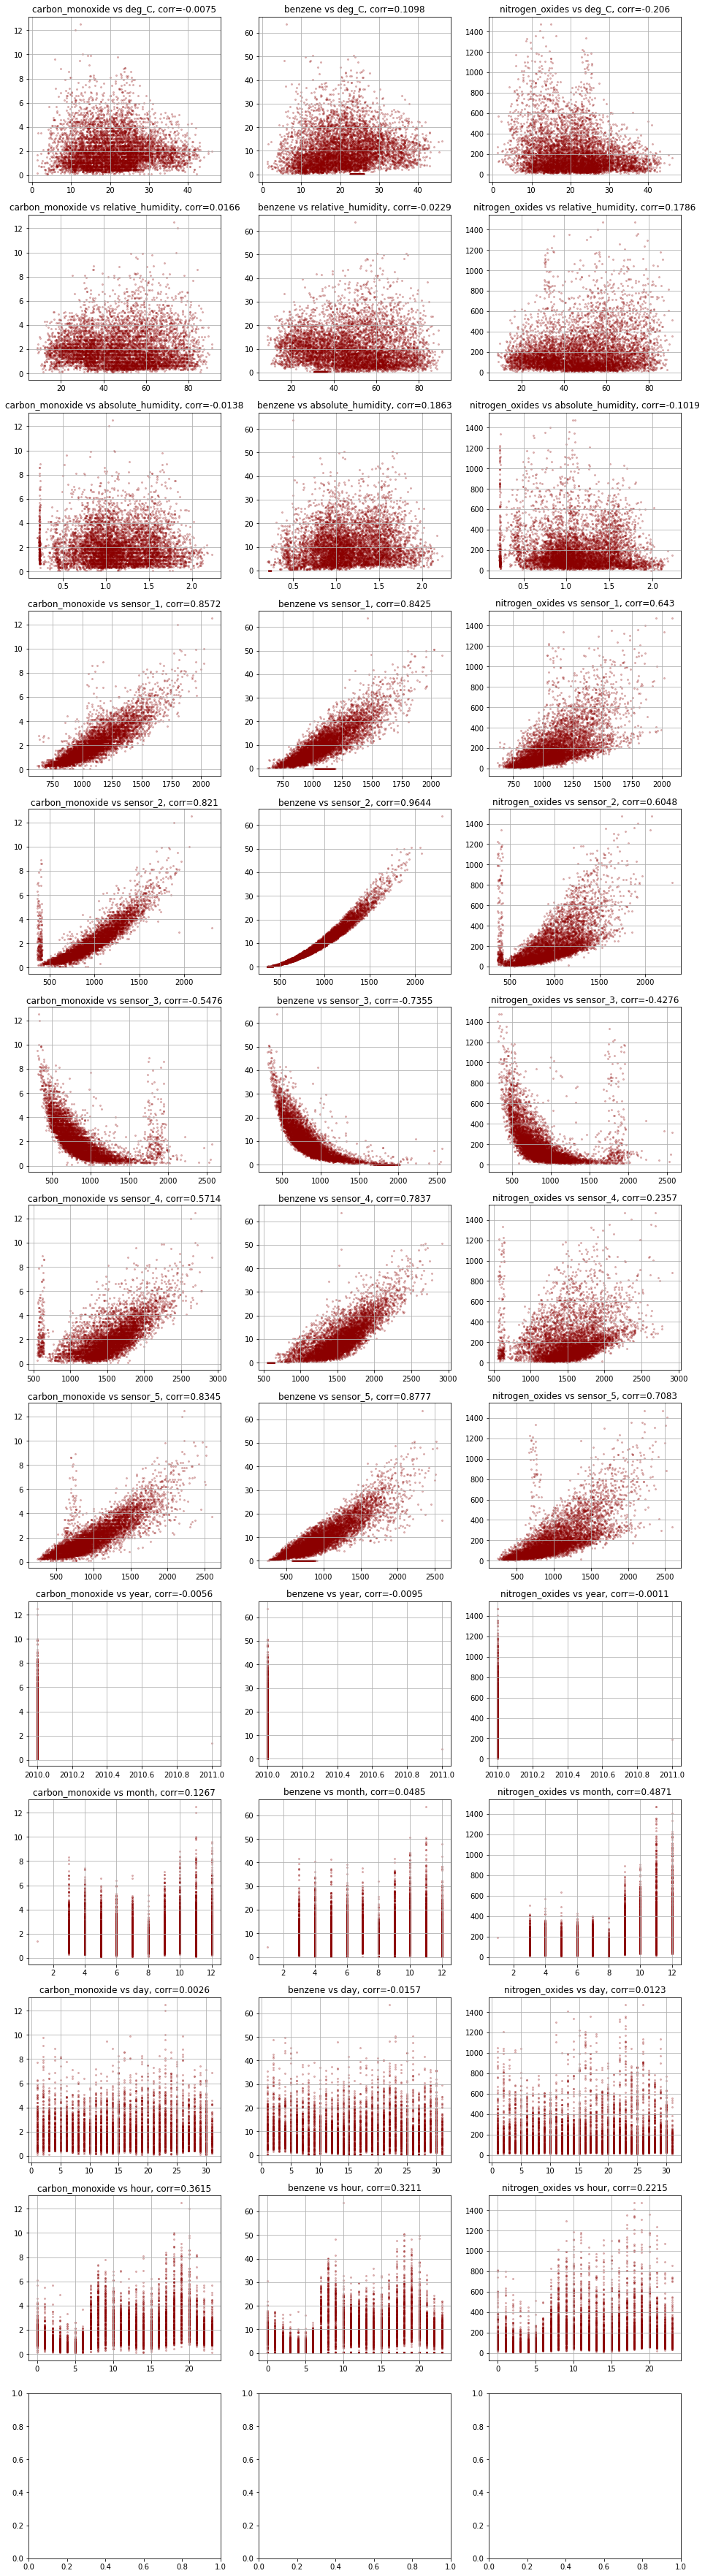

In [27]:
# plot targets vs features column-wise
fig, axs = plt.subplots(13, 3, figsize=(16,64))
i = 0
for f in features_num + features_time:
    for t in targets:
        current_ax = axs.flat[i]
        corr_t = np.round(df_train[f].corr(df_train[t], method='pearson'),4)
        current_ax.scatter(df_train[f], df_train[t],
                           alpha=0.25, s=4,
                           color='darkred')
        t_short = t.replace('target_','')
        current_ax.set_title(t_short + ' vs ' + f + ', corr=' + str(corr_t))
        current_ax.grid()
        i = i + 1

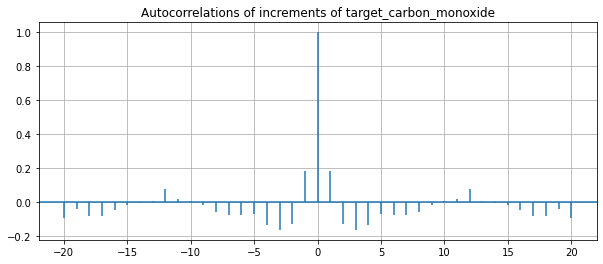

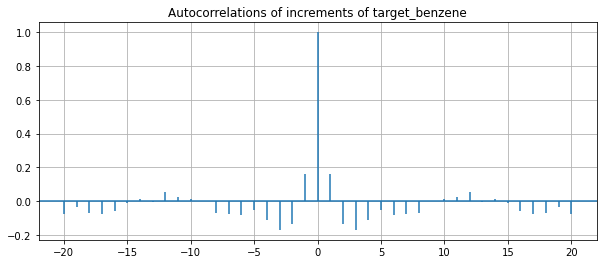

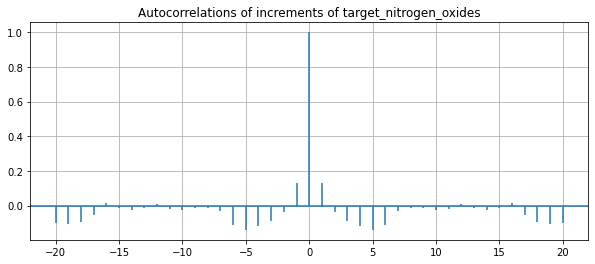

In [28]:
# autocorrelation of targets
for t in targets:
    plt.figure(figsize=(10,4))
    plt.acorr(df_train[t].diff()[2:], maxlags=20)
    plt.title('Autocorrelations of increments of ' + t)
    plt.grid()
    plt.show()

In [29]:
df_train.head()

date_time  deg_C  relative_humidity  absolute_humidity  sensor_1  \
0 2010-03-10 18:00:00   13.1               46.0             0.7578    1387.2   
1 2010-03-10 19:00:00   13.2               45.3             0.7255    1279.1   
2 2010-03-10 20:00:00   12.6               56.2             0.7502    1331.9   
3 2010-03-10 21:00:00   11.0               62.4             0.7867    1321.0   
4 2010-03-10 22:00:00   11.9               59.0             0.7888    1272.0   

   sensor_2  sensor_3  sensor_4  sensor_5  target_carbon_monoxide  ...  month  \
0    1087.8    1056.0    1742.8    1293.4                     2.5  ...      3   
1     888.2    1197.5    1449.9    1010.9                     2.1  ...      3   
2     929.6    1060.2    1586.1    1117.0                     2.2  ...      3   
3     929.0    1102.9    1536.5    1263.2                     2.2  ...      3   
4     852.7    1180.9    1415.5    1132.2                     1.5  ...      3   

   day  hour  0  1  2  3  4  5  6  
0   10    18  0  0  1  0  0  0  0  
1   10    19  0  0  1  0  0  0  0  
2   10    20  0  0  1  0  0  0  0  
3   10    21  0  0  1  0  0  0  0  
4   10    22  0  0  1  0  0  0  0  

[5 rows x 23 columns]

In [30]:
df_train.drop(columns = ['date_time', 'year', 'day'], inplace=True)

In [31]:
df_train.head()

deg_C  relative_humidity  absolute_humidity  sensor_1  sensor_2  sensor_3  \
0   13.1               46.0             0.7578    1387.2    1087.8    1056.0   
1   13.2               45.3             0.7255    1279.1     888.2    1197.5   
2   12.6               56.2             0.7502    1331.9     929.6    1060.2   
3   11.0               62.4             0.7867    1321.0     929.0    1102.9   
4   11.9               59.0             0.7888    1272.0     852.7    1180.9   

   sensor_4  sensor_5  target_carbon_monoxide  target_benzene  \
0    1742.8    1293.4                     2.5            12.0   
1    1449.9    1010.9                     2.1             9.9   
2    1586.1    1117.0                     2.2             9.2   
3    1536.5    1263.2                     2.2             9.7   
4    1415.5    1132.2                     1.5             6.4   

   target_nitrogen_oxides  month  hour  0  1  2  3  4  5  6  
0                   167.7      3    18  0  0  1  0  0  0  0  
1                    98.9      3    19  0  0  1  0  0  0  0  
2                   127.1      3    20  0  0  1  0  0  0  0  
3                   177.2      3    21  0  0  1  0  0  0  0  
4                   121.8      3    22  0  0  1  0  0  0  0

In [32]:
df_test.drop(columns = ['date_time', 'year', 'day'], inplace=True)
df_test.head()

deg_C  relative_humidity  absolute_humidity  sensor_1  sensor_2  sensor_3  \
0    8.0               41.3             0.4375    1108.8     745.7     797.1   
1    5.1               51.7             0.4564    1249.5     864.9     687.9   
2    5.8               51.5             0.4689    1102.6     878.0     693.7   
3    5.0               52.3             0.4693    1139.7     916.2     725.6   
4    4.5               57.5             0.4650    1022.4     838.5     871.5   

   sensor_4  sensor_5  month  hour  0  1  2  3  4  5  6  
0     880.0    1273.1      1     0  0  0  0  0  0  1  0  
1     972.8    1714.0      1     1  0  0  0  0  0  1  0  
2     941.9    1300.8      1     2  0  0  0  0  0  1  0  
3    1011.0    1283.0      1     3  0  0  0  0  0  1  0  
4     967.0    1142.3      1     4  0  0  0  0  0  1  0

In [33]:
from pycaret.regression import setup, compare_models, create_model, blend_models, finalize_model, predict_model, plot_model

In [34]:
train_co = df_train.drop(columns = ['target_benzene', 'target_nitrogen_oxides'])

train_be = df_train.drop(columns = ['target_carbon_monoxide', 'target_nitrogen_oxides'])

train_no = df_train.drop(columns = ['target_carbon_monoxide', 'target_benzene'])

In [35]:
sub = pd.read_csv('sample_submission.csv')

In [36]:
sub.head()

date_time  target_carbon_monoxide  target_benzene  \
0  2011-01-01 00:00:00                     2.0            10.0   
1  2011-01-01 01:00:00                     2.0            10.0   
2  2011-01-01 02:00:00                     2.0            10.0   
3  2011-01-01 03:00:00                     2.0            10.0   
4  2011-01-01 04:00:00                     2.0            10.0   

   target_nitrogen_oxides  
0                   300.0  
1                   300.0  
2                   300.0  
3                   300.0  
4                   300.0

In [37]:
setup(train_co, target='target_carbon_monoxide')

(          deg_C  relative_humidity  absolute_humidity     sensor_1  \
 915   17.600000          48.500000             0.9743  1012.900024   
 2600  24.200001          47.799999             1.5076   976.400024   
 2038  27.400000          20.700001             0.8811   932.299988   
 3634  22.600000          69.599998             1.9079   869.200012   
 4513  23.299999          63.400002             1.9067  1216.000000   
 ...         ...                ...                ...          ...   
 4288  33.799999          25.700001             1.2477   917.000000   
 6170   9.000000          56.400002             0.6183  1671.900024   
 5611  22.600000          59.900002             1.6596  1353.000000   
 2200  30.100000          36.000000             1.4414  1243.800049   
 1781  20.000000          43.099998             0.9339   948.599976   
 
          sensor_2     sensor_3     sensor_4     sensor_5  hour  0  ...  \
 915    761.500000  1001.599976  1541.300049   805.799988  21.0  0  ...

In [38]:
compare_models()

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=5771, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [39]:
lgbm = create_model('lightgbm')

In [40]:
predict_model(lgbm, df_test)

deg_C  relative_humidity  absolute_humidity  sensor_1  sensor_2  \
0       8.0               41.3             0.4375    1108.8     745.7   
1       5.1               51.7             0.4564    1249.5     864.9   
2       5.8               51.5             0.4689    1102.6     878.0   
3       5.0               52.3             0.4693    1139.7     916.2   
4       4.5               57.5             0.4650    1022.4     838.5   
...     ...                ...                ...       ...       ...   
2242   23.2               28.7             0.7568    1340.3    1023.9   
2243   24.5               22.5             0.7119    1232.8     955.1   
2244   26.6               19.0             0.6406    1187.7    1052.4   
2245   29.1               12.7             0.5139    1053.2    1009.0   
2246   27.9               13.5             0.5028    1124.6    1078.4   

      sensor_3  sensor_4  sensor_5  month  hour  0  1  2  3  4  5  6     Label  
0        797.1     880.0    1273.1      1     0  0  0  0  0  0  1  0  1.267238  
1        687.9     972.8    1714.0      1     1  0  0  0  0  0  1  0  1.481615  
2        693.7     941.9    1300.8      1     2  0  0  0  0  0  1  0  1.453079  
3        725.6    1011.0    1283.0      1     3  0  0  0  0  0  1  0  1.641775  
4        871.5     967.0    1142.3      1     4  0  0  0  0  0  1  0  1.020557  
...        ...       ...       ...    ...   ... .. .. .. .. .. .. ..       ...  
2242     522.8    1374.0    1659.8      4    10  1  0  0  0  0  0  0  2.632489  
2243     616.1    1226.1    1269.0      4    11  1  0  0  0  0  0  0  2.238902  
2244     572.8    1253.4    1081.1      4    12  1  0  0  0  0  0  0  2.444654  
2245     702.0    1009.8     808.5      4    13  1  0  0  0  0  0  0  2.069297  
2246     608.2    1061.3     816.0      4    14  1  0  0  0  0  0  0  2.191147  

[2247 rows x 18 columns]

In [41]:
sub['target_carbon_monoxide'] = predict_model(lgbm, df_test)['Label']

In [42]:
sub

date_time  target_carbon_monoxide  target_benzene  \
0     2011-01-01 00:00:00                1.267238            10.0   
1     2011-01-01 01:00:00                1.481615            10.0   
2     2011-01-01 02:00:00                1.453079            10.0   
3     2011-01-01 03:00:00                1.641775            10.0   
4     2011-01-01 04:00:00                1.020557            10.0   
...                   ...                     ...             ...   
2242  2011-04-04 10:00:00                2.632489            10.0   
2243  2011-04-04 11:00:00                2.238902            10.0   
2244  2011-04-04 12:00:00                2.444654            10.0   
2245  2011-04-04 13:00:00                2.069297            10.0   
2246  2011-04-04 14:00:00                2.191147            10.0   

      target_nitrogen_oxides  
0                      300.0  
1                      300.0  
2                      300.0  
3                      300.0  
4                      300.0  
...                      ...  
2242                   300.0  
2243                   300.0  
2244                   300.0  
2245                   300.0  
2246                   300.0  

[2247 rows x 4 columns]

In [43]:
setup(train_be, target='target_benzene')

(          deg_C  relative_humidity  absolute_humidity     sensor_1  \
 511   10.700000          61.299999             0.8652  1075.300049   
 428   17.900000          23.500000             0.5319   917.700012   
 3317  26.600000          36.400002             1.3842  1007.000000   
 2129  30.000000          22.900000             1.0994   978.000000   
 6635   5.500000          61.000000             0.5656   964.599976   
 ...         ...                ...                ...          ...   
 4133  24.799999          54.099998             1.6210  1230.699951   
 5930  16.799999          58.200001             1.0921  1263.500000   
 4950  21.900000          58.400002             1.5505  1150.199951   
 834   17.100000          35.599998             0.7185  1054.699951   
 200   12.800000          69.300003             1.0029   929.099976   
 
          sensor_2     sensor_3     sensor_4     sensor_5  hour  0  ...  \
 511    816.200012  1010.400024  1339.500000   915.700012   1.0  0  ...

In [44]:
compare_models()

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=2914, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [45]:
lgbm = create_model('lightgbm')

In [46]:
predict_model(lgbm, df_test)

deg_C  relative_humidity  absolute_humidity  sensor_1  sensor_2  \
0       8.0               41.3             0.4375    1108.8     745.7   
1       5.1               51.7             0.4564    1249.5     864.9   
2       5.8               51.5             0.4689    1102.6     878.0   
3       5.0               52.3             0.4693    1139.7     916.2   
4       4.5               57.5             0.4650    1022.4     838.5   
...     ...                ...                ...       ...       ...   
2242   23.2               28.7             0.7568    1340.3    1023.9   
2243   24.5               22.5             0.7119    1232.8     955.1   
2244   26.6               19.0             0.6406    1187.7    1052.4   
2245   29.1               12.7             0.5139    1053.2    1009.0   
2246   27.9               13.5             0.5028    1124.6    1078.4   

      sensor_3  sensor_4  sensor_5  month  hour  0  1  2  3  4  5  6  \
0        797.1     880.0    1273.1      1     0  0  0  0  0  0  1  0   
1        687.9     972.8    1714.0      1     1  0  0  0  0  0  1  0   
2        693.7     941.9    1300.8      1     2  0  0  0  0  0  1  0   
3        725.6    1011.0    1283.0      1     3  0  0  0  0  0  1  0   
4        871.5     967.0    1142.3      1     4  0  0  0  0  0  1  0   
...        ...       ...       ...    ...   ... .. .. .. .. .. .. ..   
2242     522.8    1374.0    1659.8      4    10  1  0  0  0  0  0  0   
2243     616.1    1226.1    1269.0      4    11  1  0  0  0  0  0  0   
2244     572.8    1253.4    1081.1      4    12  1  0  0  0  0  0  0   
2245     702.0    1009.8     808.5      4    13  1  0  0  0  0  0  0   
2246     608.2    1061.3     816.0      4    14  1  0  0  0  0  0  0   

          Label  
0      4.994416  
1      7.110874  
2      7.541381  
3      7.883599  
4      6.159246  
...         ...  
2242  12.741923  
2243  10.259436  
2244  12.216713  
2245  11.213592  
2246  13.413240  

[2247 rows x 18 columns]

In [47]:
sub['target_benzene'] = predict_model(lgbm, df_test)['Label']

In [48]:
sub

date_time  target_carbon_monoxide  target_benzene  \
0     2011-01-01 00:00:00                1.267238        4.994416   
1     2011-01-01 01:00:00                1.481615        7.110874   
2     2011-01-01 02:00:00                1.453079        7.541381   
3     2011-01-01 03:00:00                1.641775        7.883599   
4     2011-01-01 04:00:00                1.020557        6.159246   
...                   ...                     ...             ...   
2242  2011-04-04 10:00:00                2.632489       12.741923   
2243  2011-04-04 11:00:00                2.238902       10.259436   
2244  2011-04-04 12:00:00                2.444654       12.216713   
2245  2011-04-04 13:00:00                2.069297       11.213592   
2246  2011-04-04 14:00:00                2.191147       13.413240   

      target_nitrogen_oxides  
0                      300.0  
1                      300.0  
2                      300.0  
3                      300.0  
4                      300.0  
...                      ...  
2242                   300.0  
2243                   300.0  
2244                   300.0  
2245                   300.0  
2246                   300.0  

[2247 rows x 4 columns]

In [49]:
setup(train_no, target='target_nitrogen_oxides')

(          deg_C  relative_humidity  absolute_humidity     sensor_1  \
 5828  13.500000          39.700001             0.5776   873.000000   
 5365  18.799999          76.599998             1.5737  1582.900024   
 3526  40.099998          22.200001             1.5366  1079.099976   
 3149  30.400000          32.099998             1.3202  1133.199951   
 6047  16.200001          42.299999             0.7483  1576.000000   
 ...         ...                ...                ...          ...   
 6084  14.300000          56.500000             0.9722   817.799988   
 6320  10.100000          85.500000             0.9855  1073.500000   
 3856  36.299999          26.900000             1.5338  1054.699951   
 2161  30.500000          26.100000             1.1832  1243.400024   
 6747  22.900000          31.299999             0.2247  1104.599976   
 
          sensor_2     sensor_3     sensor_4     sensor_5  hour  0  ...  \
 5828  1036.699951   803.599976  1203.599976   829.200012  14.0  1  ...

In [50]:
compare_models()

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=7120, verbose=0, warm_start=False)

In [51]:
et = create_model('et')

In [52]:
predict_model(et, df_test)

deg_C  relative_humidity  absolute_humidity  sensor_1  sensor_2  \
0       8.0               41.3             0.4375    1108.8     745.7   
1       5.1               51.7             0.4564    1249.5     864.9   
2       5.8               51.5             0.4689    1102.6     878.0   
3       5.0               52.3             0.4693    1139.7     916.2   
4       4.5               57.5             0.4650    1022.4     838.5   
...     ...                ...                ...       ...       ...   
2242   23.2               28.7             0.7568    1340.3    1023.9   
2243   24.5               22.5             0.7119    1232.8     955.1   
2244   26.6               19.0             0.6406    1187.7    1052.4   
2245   29.1               12.7             0.5139    1053.2    1009.0   
2246   27.9               13.5             0.5028    1124.6    1078.4   

      sensor_3  sensor_4  sensor_5  month  hour  0  1  2  3  4  5  6  \
0        797.1     880.0    1273.1      1     0  0  0  0  0  0  1  0   
1        687.9     972.8    1714.0      1     1  0  0  0  0  0  1  0   
2        693.7     941.9    1300.8      1     2  0  0  0  0  0  1  0   
3        725.6    1011.0    1283.0      1     3  0  0  0  0  0  1  0   
4        871.5     967.0    1142.3      1     4  0  0  0  0  0  1  0   
...        ...       ...       ...    ...   ... .. .. .. .. .. .. ..   
2242     522.8    1374.0    1659.8      4    10  1  0  0  0  0  0  0   
2243     616.1    1226.1    1269.0      4    11  1  0  0  0  0  0  0   
2244     572.8    1253.4    1081.1      4    12  1  0  0  0  0  0  0   
2245     702.0    1009.8     808.5      4    13  1  0  0  0  0  0  0   
2246     608.2    1061.3     816.0      4    14  1  0  0  0  0  0  0   

           Label  
0     186.500000  
1     207.924998  
2     154.127999  
3     153.903000  
4     116.651000  
...          ...  
2242  280.582001  
2243  153.070001  
2244  172.114999  
2245  126.751001  
2246  141.586000  

[2247 rows x 18 columns]

In [53]:
sub['target_nitrogen_oxides'] = predict_model(et, df_test)['Label']

In [54]:
sub

date_time  target_carbon_monoxide  target_benzene  \
0     2011-01-01 00:00:00                1.267238        4.994416   
1     2011-01-01 01:00:00                1.481615        7.110874   
2     2011-01-01 02:00:00                1.453079        7.541381   
3     2011-01-01 03:00:00                1.641775        7.883599   
4     2011-01-01 04:00:00                1.020557        6.159246   
...                   ...                     ...             ...   
2242  2011-04-04 10:00:00                2.632489       12.741923   
2243  2011-04-04 11:00:00                2.238902       10.259436   
2244  2011-04-04 12:00:00                2.444654       12.216713   
2245  2011-04-04 13:00:00                2.069297       11.213592   
2246  2011-04-04 14:00:00                2.191147       13.413240   

      target_nitrogen_oxides  
0                 186.500000  
1                 207.924998  
2                 154.127999  
3                 153.903000  
4                 116.651000  
...                      ...  
2242              280.582001  
2243              153.070001  
2244              172.114999  
2245              126.751001  
2246              141.586000  

[2247 rows x 4 columns]

In [55]:
sub.to_csv('sub.csv', index=False)